# 다음 분기에 어떤 게임을 설계해야 할까

# EDA & Data Wrangling
- 데이터 확인 결과 연도, 플랫폼, 장르에 결측치 존재
- 연도와 장르는 결측치를 임의의 값으로 대체하기 어렵다고 판단하여 삭제
- 플랫폼의 결측치는 프로젝트 목표에 크게 유의미하지 않다고 판단하여 unknown으로 대체
- 연도와 출고량의 이상치는 히스토그램을 줄여가며 파악 후 제거

In [2]:
# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
import pandas as pd
df = pd.read_csv('vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
# 불필요한 컬럼 제거
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df_clean = df.copy()

In [8]:
# Publisher 데이터는 프로젝트 결론 도출에 크게 유의미하지 않다고 판단하여 결측치는 unknown으로 대체한다.
df_clean['Publisher'] = df_clean['Publisher'].fillna('Unknown')
df_clean.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [9]:
# Year 데이터의 결측치는 임의의 값으로 대체하기 어렵다고 판단하여 삭제
df_clean.dropna(subset=['Year'], inplace=True)
df_clean.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [10]:
# Year 데이터 타입 변경
df_clean['Year'] = df_clean['Year'].astype(int)
df_clean['Year'].head()

0    2008
1    2009
2    2010
3    2010
4    2010
Name: Year, dtype: int64

In [11]:
# Genre 데이터의 결측치는 임의의 값으로 대체하기 어렵다고 판단하여 삭제
df_clean.dropna(subset=['Genre'], inplace=True)
df_clean.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [12]:
# 중복 데이터 확인
df_clean.duplicated().sum()

0

In [13]:
# 출고량 단위에서 M 삭제
df_clean.NA_Sales = df_clean.NA_Sales.str.replace('M','')
df_clean.EU_Sales = df_clean.EU_Sales.str.replace('M','')
df_clean.JP_Sales = df_clean.JP_Sales.str.replace('M','')
df_clean.Other_Sales = df_clean.Other_Sales.str.replace('M','')

In [14]:
# 출고량 단위에서 K 삭제
ns = df_clean.loc[df_clean.NA_Sales.str.contains('K')].NA_Sales.str.replace('K','').astype(float) * 0.001
es = df_clean.loc[df_clean.EU_Sales.str.contains('K')].EU_Sales.str.replace('K','').astype(float) * 0.001
js = df_clean.loc[df_clean.JP_Sales.str.contains('K')].JP_Sales.str.replace('K','').astype(float) * 0.001
os = df_clean.loc[df_clean.Other_Sales.str.contains('K')].Other_Sales.str.replace('K','').astype(float) * 0.001

In [15]:
df_clean['NA_Sales'].loc[df_clean.NA_Sales.str.contains('K')] = ns
df_clean['EU_Sales'].loc[df_clean.EU_Sales.str.contains('K')] = es
df_clean['JP_Sales'].loc[df_clean.JP_Sales.str.contains('K')] = js
df_clean['Other_Sales'].loc[df_clean.Other_Sales.str.contains('K')] = os

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
# 출고량 데이터타입 변경
df_clean = df_clean.astype({'NA_Sales':'float', 'EU_Sales':'float', 'JP_Sales':'float', 'Other_Sales':'float'})

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  int64  
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


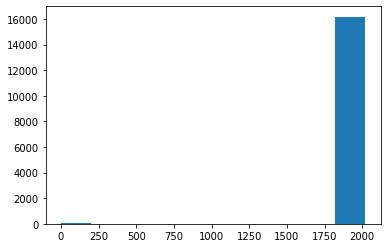

In [18]:
import matplotlib.pyplot as plt

plt.hist(df_clean.Year);

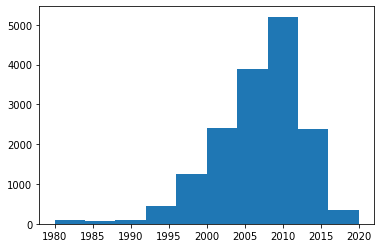

In [19]:
plt.hist(df_clean.Year[df_clean.Year > 1750]);

In [20]:
below_1750 = df_clean[df_clean.Year <= 1750]
above_1750 = df_clean[df_clean.Year > 1750]

In [21]:
len(below_1750), len(above_1750)

(100, 16177)

In [22]:
len(below_1750) / len(above_1750)

0.006181615874389566

In [23]:
df_clean = df_clean.drop(index = df_clean[df_clean.Year <= 1750].index)

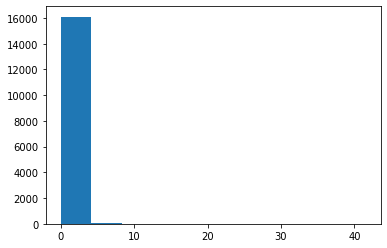

In [24]:
# na sales 이상치 확인
plt.hist(df_clean.NA_Sales);

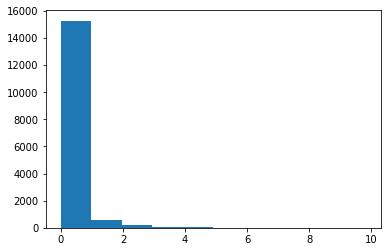

In [25]:
plt.hist(df_clean.NA_Sales[df_clean.NA_Sales < 10]);

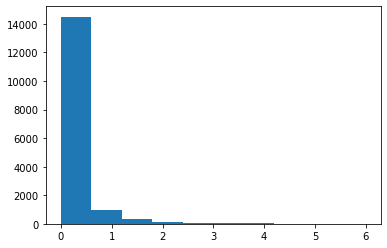

In [26]:
plt.hist(df_clean.NA_Sales[df_clean.NA_Sales < 6]);

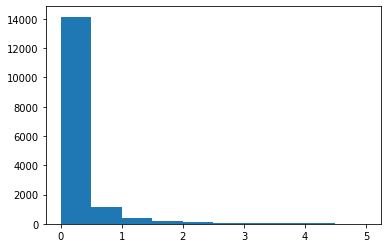

In [27]:
plt.hist(df_clean.NA_Sales[df_clean.NA_Sales < 5]);

In [28]:
len(df_clean.NA_Sales[df_clean.NA_Sales > 5]), len(df_clean.NA_Sales[df_clean.NA_Sales <=5])

(55, 16122)

In [29]:
len(df_clean.NA_Sales[df_clean.NA_Sales > 5]) / len(df_clean.NA_Sales[df_clean.NA_Sales <=5])

0.0034114874085101102

In [30]:
df_clean = df_clean.drop(index = df_clean[df_clean.NA_Sales > 5].index)

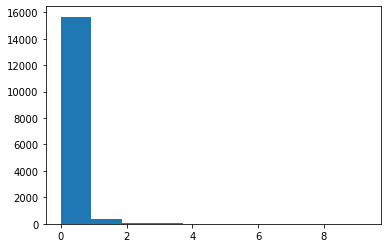

In [31]:
# eu sales 이상치 확인
plt.hist(df_clean.EU_Sales);

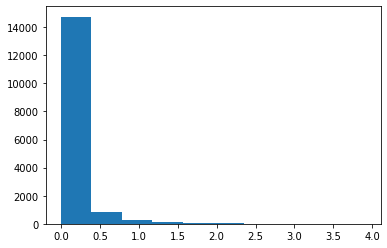

In [32]:
plt.hist(df_clean.EU_Sales[df_clean.EU_Sales < 4]);

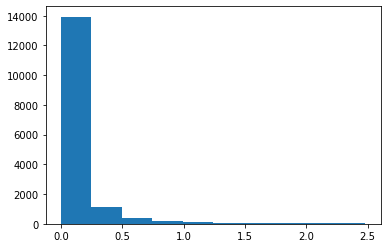

In [33]:
plt.hist(df_clean.EU_Sales[df_clean.EU_Sales < 2.5]);

In [34]:
len(df_clean.EU_Sales[df_clean.EU_Sales > 2.5]) / len(df_clean.NA_Sales[df_clean.NA_Sales <= 2.5])

0.0031302823514681023

In [35]:
df_clean = df_clean.drop(index = df_clean[df_clean.EU_Sales > 2.5].index)

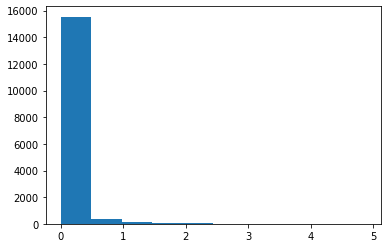

In [36]:
# jp sales 이상치 확인
plt.hist(df_clean.JP_Sales);

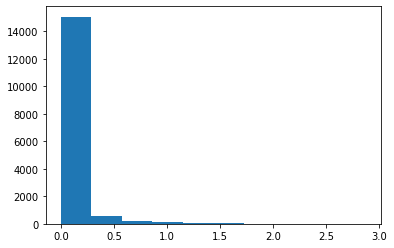

In [37]:
plt.hist(df_clean.JP_Sales[df_clean.JP_Sales < 3]);

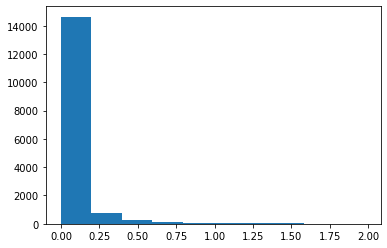

In [38]:
plt.hist(df_clean.JP_Sales[df_clean.JP_Sales < 2.0]);

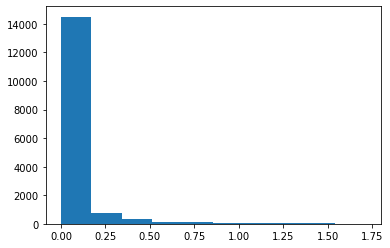

In [39]:
plt.hist(df_clean.JP_Sales[df_clean.JP_Sales < 1.75]);

In [40]:
len(df_clean.JP_Sales[df_clean.JP_Sales > 1.75]) / len(df_clean.JP_Sales[df_clean.JP_Sales <= 1.75])

0.0034965034965034965

In [41]:
df_clean = df_clean.drop(index = df_clean[df_clean.JP_Sales > 1.75].index)

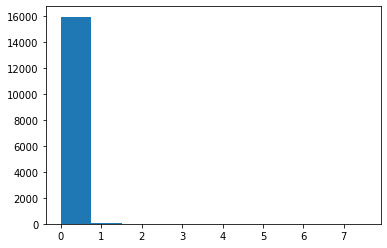

In [42]:
# other sales 이상치 확인
plt.hist(df_clean.Other_Sales);

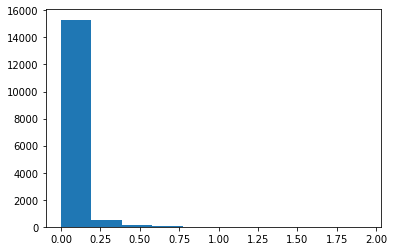

In [43]:
plt.hist(df_clean.Other_Sales[df_clean.Other_Sales < 2]);

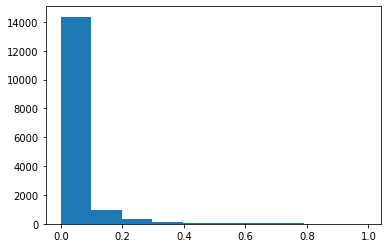

In [44]:
plt.hist(df_clean.Other_Sales[df_clean.Other_Sales < 1.0]);

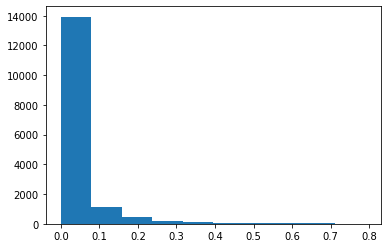

In [45]:
plt.hist(df_clean.Other_Sales[df_clean.Other_Sales < 0.8]);

In [46]:
len(df_clean.Other_Sales[df_clean.Other_Sales > 0.8]) / len(df_clean.Other_Sales[df_clean.Other_Sales <= 0.8])

0.0024410089503661514

In [47]:
df_clean = df_clean.drop(index = df_clean[df_clean.Other_Sales > 0.8].index)

# Misson 1. 지역에 따라서 선호하는 게임 장르가 다를까

## **1. 북미 지역이 선호하는 장르**

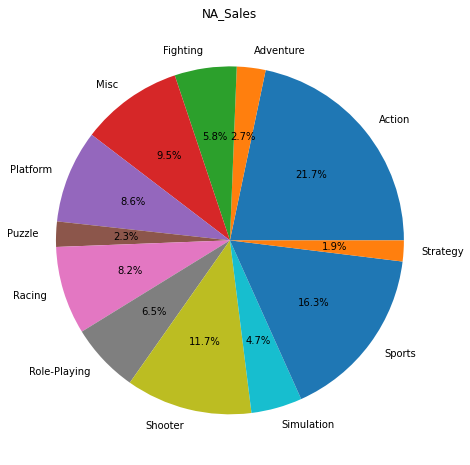

In [48]:
plt.figure(figsize=(8,8))
plt.pie(df_clean.groupby('Genre')['NA_Sales'].sum(), labels=df_clean.groupby('Genre')['NA_Sales'].sum().index, autopct='%.1f%%')
plt.title('NA_Sales')
plt.show();

## **2. 유럽 지역이 선호하는 장르**

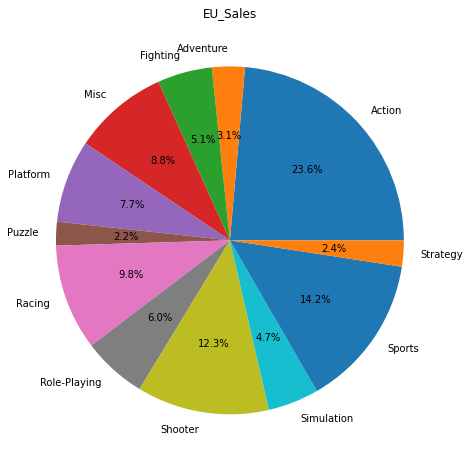

In [49]:
plt.figure(figsize=(8,8))
plt.pie(df_clean.groupby('Genre')['EU_Sales'].sum(), labels=df_clean.groupby('Genre')['EU_Sales'].sum().index, autopct='%.1f%%')
plt.title('EU_Sales')
plt.show();

## **3. 일본이 선호하는 장르**

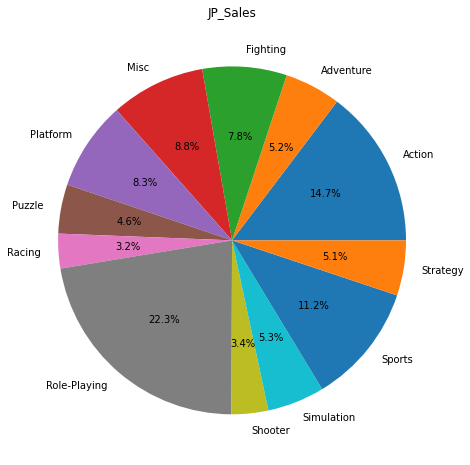

In [50]:
plt.figure(figsize=(8,8))
plt.pie(df_clean.groupby('Genre')['JP_Sales'].sum(), labels=df_clean.groupby('Genre')['JP_Sales'].sum().index, autopct='%.1f%%')
plt.title('JP_Sales')
plt.show();

# Misson 2. 연도별 게임의 트렌드가 있을까

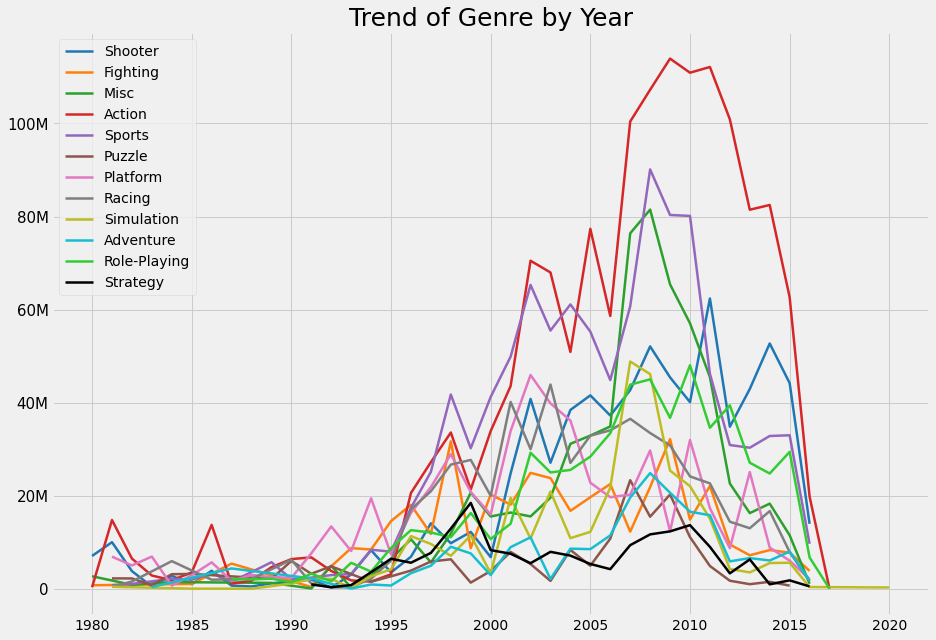

In [56]:
#장르별 전체 출고량의 변화
#장르별 평균 판매량을 연도순으로 정렬
import seaborn as sns
df_clean['Total_Sales'] = df_clean[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

s_y = df_clean.groupby(['Genre','Year'],as_index=False)['Total_Sales'].sum()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(14,10))

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

ax1= sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Shooter'").Total_Sales,linewidth=2.5,label='Shooter',color='#1f77b4')
ax2 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Fighting'").Total_Sales,linewidth=2.5,label='Fighting',color='#ff7f0e')
ax3 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Misc'").Total_Sales,linewidth=2.5,label='Misc',color='#2ca02c')
ax4 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Action'").Total_Sales,linewidth=2.5,label='Action',color='#d62728')
ax5 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Sports'").Total_Sales,linewidth=2.5,label='Sports',color='#9467bd')
ax6 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Puzzle'").Total_Sales,linewidth=2.5,label='Puzzle',color='#8c564b')
ax7 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Platform'").Total_Sales,linewidth=2.5,label='Platform',color='#e377c2')
ax8 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Racing'").Total_Sales,linewidth=2.5,label='Racing',color='#7f7f7f')
ax9 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Simulation'").Total_Sales,linewidth=2.5,label='Simulation',color='#bcbd22')
ax10 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Adventure'").Total_Sales,linewidth=2.5,label='Adventure',color='#17becf')
ax11 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Role-Playing'").Total_Sales,linewidth=2.5,label='Role-Playing',color='limegreen')
ax12 = sns.lineplot(x=s_y.Year, y= s_y.query("Genre=='Strategy'").Total_Sales,linewidth=2.5,label='Strategy',color='k')
ax.set_yticks([ 0,20, 40,60, 80,100])
ax.set_yticklabels(labels=['0','20M','40M','60M','80M','100M'], fontsize=15)
plt.title('Trend of Genre by Year', fontsize=25)

ax.set(xlabel=None , ylabel=None)
plt.legend();

# Misson 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [57]:
df_rank_by_sales = df_clean.sort_values('Total_Sales', ascending = False).reset_index(drop=True)
df_rank_by_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Mario Party 8,Wii,2007,Misc,Nintendo,3.81,2.30,1.58,0.73,8.42
1,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70
2,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
3,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.57
4,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.38
...,...,...,...,...,...,...,...,...,...,...
15972,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,0.01
15973,Neo Angelique Special,PSP,2008,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
15974,Dramatical Murder Re:code,PSV,2014,Adventure,Nitroplus,0.00,0.00,0.01,0.00,0.01
15975,Madagascar: Escape 2 Africa,PC,2008,Action,Activision,0.01,0.00,0.00,0.00,0.01


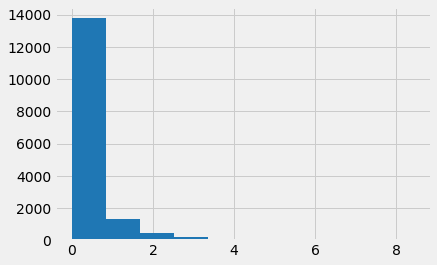

In [58]:
plt.hist(df_rank_by_sales.Total_Sales);

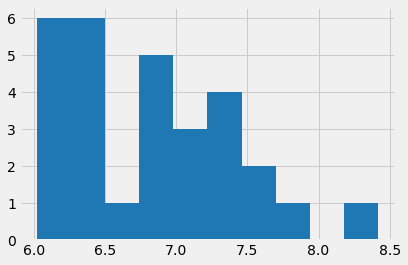

In [59]:
plt.hist(df_rank_by_sales.Total_Sales[df_rank_by_sales.Total_Sales > 6]);

In [60]:
# 출고량이 높은 게임의 장르
df_popular_genre = pd.DataFrame(df_rank_by_sales[df_rank_by_sales.Total_Sales > 6].groupby('Genre').size()).rename(columns={0:'Amount'}).reset_index()
df_popular_genre

,Genre,Amount
0,Action,6
1,Fighting,2
2,Misc,2
3,Platform,7
4,Racing,2
5,Role-Playing,1
6,Shooter,8
7,Sports,1


## **1. 출고량이 높은 게임의 장르**

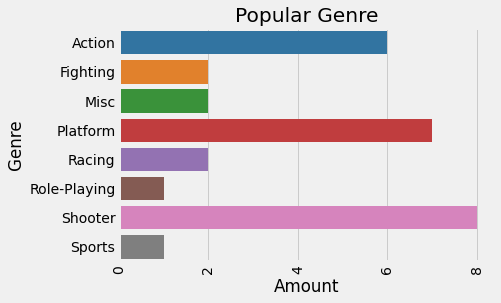

In [61]:
sns.barplot(y='Genre', x='Amount', data=df_popular_genre)
plt.xticks(rotation=90)
plt.title("Popular Genre")
plt.show();

In [62]:
# 출고량이 높은 게임의 플랫폼
df_popular_platform = pd.DataFrame(df_rank_by_sales[df_rank_by_sales.Total_Sales > 6].groupby('Platform').size()).rename(columns={0:'Amount'}).reset_index()
df_popular_platform

,Platform,Amount
0,GC,3
1,GEN,1
2,N64,1
3,NES,1
4,PS,5
5,PS2,2
6,Wii,5
7,WiiU,1
8,X360,8
9,XB,1


## **2. 출고량이 높은 게임의 플랫폼**

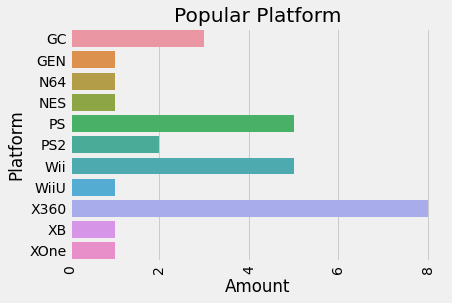

In [63]:
sns.barplot(y='Platform', x='Amount', data=df_popular_platform)
plt.xticks(rotation=90)
plt.title("Popular Platform")
plt.show();

In [64]:
# 출고량이 높은 게임의 퍼블리셔
df_popular_publisher = pd.DataFrame(df_rank_by_sales[df_rank_by_sales.Total_Sales > 6].groupby('Publisher').size()).rename(columns={0:'Amount'}).reset_index()
df_popular_publisher

,Publisher,Amount
0,Activision,2
1,Electronic Arts,1
2,Konami Digital Entertainment,2
3,Microsoft Game Studios,6
4,Nintendo,10
5,Sega,1
6,Sony Computer Entertainment,5
7,Take-Two Interactive,1
8,Ubisoft,1


## **3. 출고량이 높은 게임의 퍼블리셔**

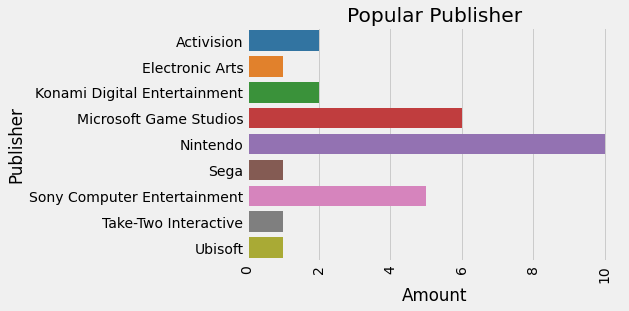

In [65]:
sns.barplot(y='Publisher', x='Amount', data=df_popular_publisher)
plt.xticks(rotation=90)
plt.title("Popular Publisher")
plt.show();

In [66]:
# 출고량이 높은 게임의 연도
df_popular_year = pd.DataFrame(df_rank_by_sales[df_rank_by_sales.Total_Sales > 6].groupby('Year').size()).rename(columns={0:'Amount'}).reset_index()
df_popular_year

,Year,Amount
0,1986,1
1,1992,1
2,1996,1
3,1997,1
4,1998,4
5,2001,3
6,2002,2
7,2003,1
8,2006,2
9,2007,1


## **4. 출고량이 높은 게임의 연도**

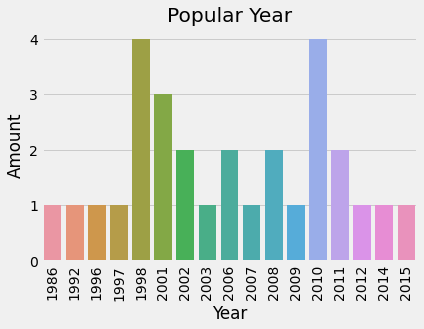

In [67]:
sns.barplot(x='Year', y='Amount', data=df_popular_year)
plt.xticks(rotation=90)
plt.title("Popular Year")
plt.show();

# 결론
북미와 유럽을 겨냥한다면 액션과 스포츠 장르를, 일본을 겨냥한다면 롤플레잉 장르에 집중해야 한다.